# pH4.6 4HFi MD RMSF RMSD Plotting with mdtraj and Pandas DataFrame 

In [12]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd

In [13]:
residue_selection = "not (resid 622 or resid 623 or resid 624 or resid 933 or resid 934 or resid 935 or resid 1244 or resid 1245 or resid 1246 or resid 0 or resid 1 or resid 2 or resid 311 or resid 312 or resid 313)"

In [14]:
location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'

In [15]:
def rmsd_ecd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4HFI_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4HFI_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    ref = ref.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [16]:
def rmsd_tmd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    ref = ref.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [17]:
def rmsd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [54]:
def rmsf_resid_dataframe(traj_name):
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.skip1.ca.xtc' 
        top_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro' 
        ref_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro'
        traj = md.load(traj_location,top=top_location)
        ref = md.load(ref_location)
        topology = traj.topology
        if traj.n_atoms != ref.n_atoms:
            traj = traj.atom_slice(topology.select(residue_selection))
        traj.superpose(ref)
        avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
        rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))
        rmsd_data = pd.DataFrame({'RMSF':rmsf,'residue':list(range(0,traj.n_atoms))})
        return rmsd_data

In [64]:
def rmsf_time_dataframe(traj_name):
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.skip1.ca.xtc' 
        top_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro' 
        ref_location = location + traj_name + '/mdrun/4HFi_ph46_' + traj_name + '_md.ca.gro'
        traj = md.load(traj_location,top=top_location)
        ref = md.load(ref_location)
        topology = traj.topology
        if traj.n_atoms != ref.n_atoms:
            traj = traj.atom_slice(topology.select(residue_selection))
        traj.superpose(ref)
        avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
        rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(1,2)))
        rmsd_data = pd.DataFrame({'RMSF':rmsf,'time':traj.time/1000})
        return rmsd_data

In [18]:
def plotrmsd(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd1.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="WT")
    rmsd2.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('ph4.6 ' + note)
    fig.tight_layout()

In [19]:
def plotrmsdhist(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd1.plot.hist(x='time',bins=100,ax=axes[0,0],legend=False,title="WT")
    rmsd2.plot.hist(x='time',bins=100,ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot.hist(x='time',bins=100,ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot.hist(x='time',bins=100,ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('ph4.6 ' + note)
    fig.tight_layout()

In [50]:
def plotrmsdall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd2.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd3.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd4.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

In [51]:
def plotrmsdhistall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd2.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd3.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd4.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

## Ref: First Frame of each MD ensemble (CA, 1555 atoms)

In [23]:
rmsd_4HFi_WT = rmsd_dataframe("WT","self")
rmsd_4HFi_F238L = rmsd_dataframe("F238L","self")
rmsd_4HFi_I233T = rmsd_dataframe("I233T","self")
rmsd_4HFi_F238LI233T = rmsd_dataframe("F238LI233T","self")

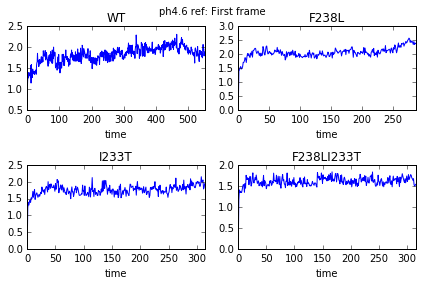

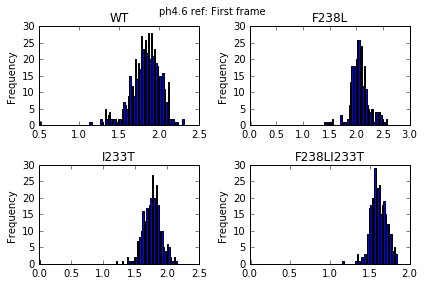

In [25]:
plotrmsd(rmsd_4HFi_WT,rmsd_4HFi_F238L,rmsd_4HFi_I233T,rmsd_4HFi_F238LI233T,note='ref: First frame')
plotrmsdhist(rmsd_4HFi_WT,rmsd_4HFi_F238L,rmsd_4HFi_I233T,rmsd_4HFi_F238LI233T,note='ref: First frame')

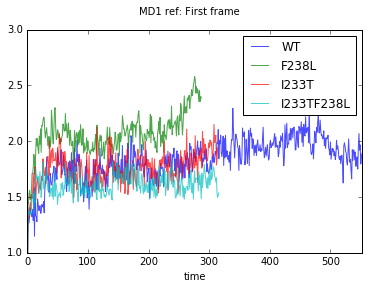

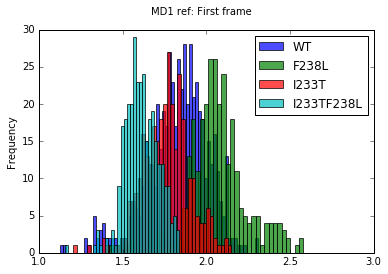

In [46]:
plotrmsdall(rmsd_4HFi_WT,rmsd_4HFi_F238L,rmsd_4HFi_I233T,rmsd_4HFi_F238LI233T,note='ref: First frame')
plotrmsdhistall(rmsd_4HFi_WT,rmsd_4HFi_F238L,rmsd_4HFi_I233T,rmsd_4HFi_F238LI233T,note='ref: First frame')

## Ref: 4NPQ_1 XRD

In [28]:
rmsd_4HFI_BA1_WT_ref_4NPQxrd = rmsd_dataframe("WT","4NPQ")
rmsd_4HFI_BA1_F238L_ref_4NPQxrd = rmsd_dataframe("F238L","4NPQ")
rmsd_4HFI_BA1_I233T_ref_4NPQxrd = rmsd_dataframe("I233T","4NPQ")
rmsd_4HFI_BA1_F238LI233T_ref_4NPQxrd = rmsd_dataframe("F238LI233T","4NPQ")

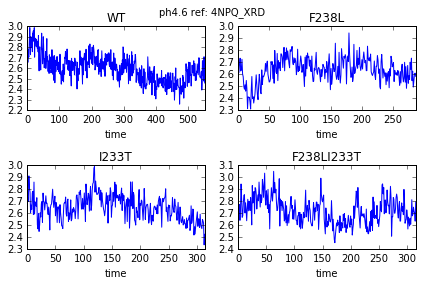

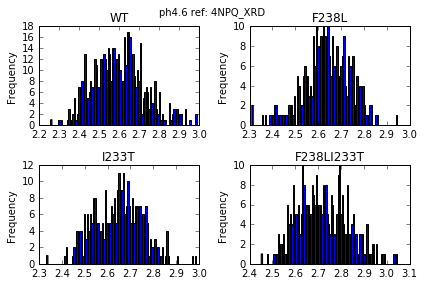

In [32]:
plotrmsd(rmsd_4HFI_BA1_WT_ref_4NPQxrd,rmsd_4HFI_BA1_F238L_ref_4NPQxrd,rmsd_4HFI_BA1_I233T_ref_4NPQxrd,rmsd_4HFI_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')
plotrmsdhist(rmsd_4HFI_BA1_WT_ref_4NPQxrd,rmsd_4HFI_BA1_F238L_ref_4NPQxrd,rmsd_4HFI_BA1_I233T_ref_4NPQxrd,rmsd_4HFI_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')

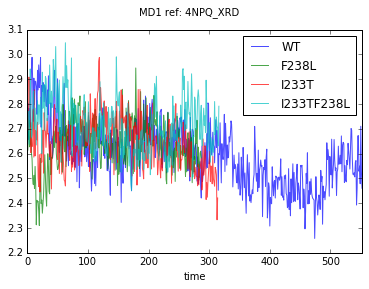

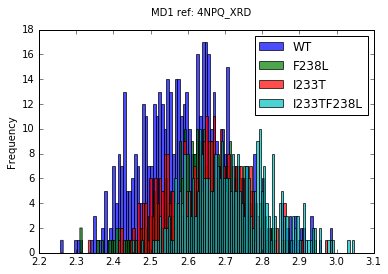

In [52]:
plotrmsdall(rmsd_4HFI_BA1_WT_ref_4NPQxrd,rmsd_4HFI_BA1_F238L_ref_4NPQxrd,rmsd_4HFI_BA1_I233T_ref_4NPQxrd,rmsd_4HFI_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')
plotrmsdhistall(rmsd_4HFI_BA1_WT_ref_4NPQxrd,rmsd_4HFI_BA1_F238L_ref_4NPQxrd,rmsd_4HFI_BA1_I233T_ref_4NPQxrd,rmsd_4HFI_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')

## Ref: 4HFI_1 XRD

In [34]:
rmsd_4HFi_BA1_WT_ref_4HFIxrd = rmsd_dataframe("WT","4HFI")
rmsd_4HFi_BA1_F238L_ref_4HFIxrd = rmsd_dataframe("F238L","4HFI")
rmsd_4HFi_BA1_I233T_ref_4HFIxrd = rmsd_dataframe("I233T","4HFI")
rmsd_4HFi_BA1_F238LI233T_ref_4HFIxrd = rmsd_dataframe("F238LI233T","4HFI")

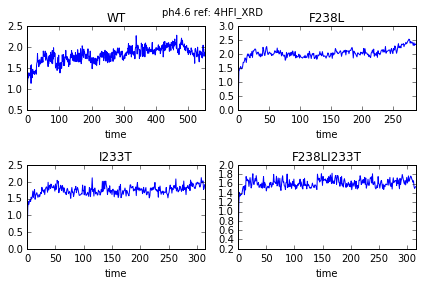

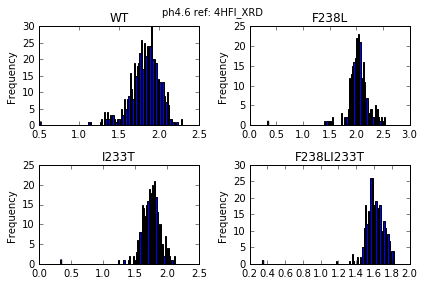

In [35]:
plotrmsd(rmsd_4HFi_BA1_WT_ref_4HFIxrd, rmsd_4HFi_BA1_F238L_ref_4HFIxrd,rmsd_4HFi_BA1_I233T_ref_4HFIxrd,rmsd_4HFi_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')
plotrmsdhist(rmsd_4HFi_BA1_WT_ref_4HFIxrd, rmsd_4HFi_BA1_F238L_ref_4HFIxrd,rmsd_4HFi_BA1_I233T_ref_4HFIxrd,rmsd_4HFi_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')

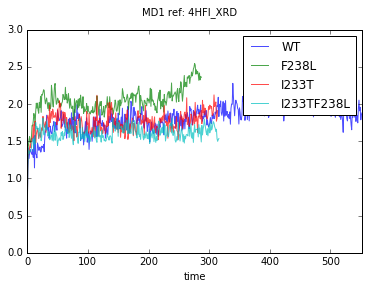

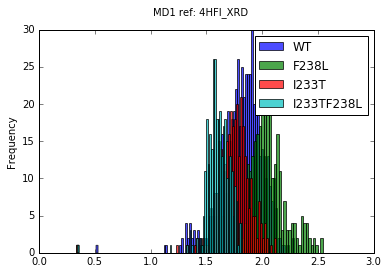

In [53]:
plotrmsdall(rmsd_4HFi_BA1_WT_ref_4HFIxrd, rmsd_4HFi_BA1_F238L_ref_4HFIxrd,rmsd_4HFi_BA1_I233T_ref_4HFIxrd,rmsd_4HFi_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')
plotrmsdhistall(rmsd_4HFi_BA1_WT_ref_4HFIxrd, rmsd_4HFi_BA1_F238L_ref_4HFIxrd,rmsd_4HFi_BA1_I233T_ref_4HFIxrd,rmsd_4HFi_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')

## Some Comparisons

## Partical RMSD

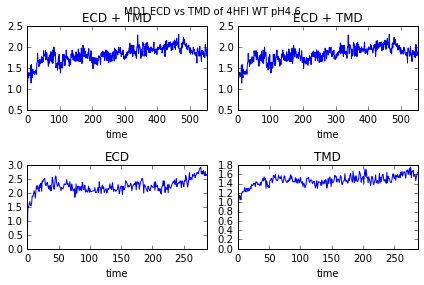

In [36]:
rmsd_ecd_4HFi_BA1_WT = rmsd_ecd_dataframe("F238L","self")
rmsd_tmd_4HFi_BA1_WT = rmsd_tmd_dataframe("F238L","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4HFi_WT.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4HFi_WT.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4HFi_BA1_WT.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4HFi_BA1_WT.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of 4HFI WT pH4.6')
fig.tight_layout()

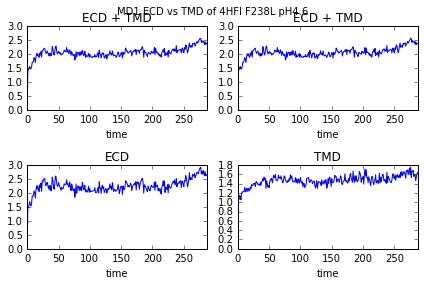

In [37]:
rmsd_ecd_4HFi_BA1_F238L = rmsd_ecd_dataframe("F238L","self")
rmsd_tmd_4HFi_BA1_F238L = rmsd_tmd_dataframe("F238L","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4HFi_F238L.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4HFi_F238L.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4HFi_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4HFi_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of 4HFI F238L pH4.6')
fig.tight_layout()

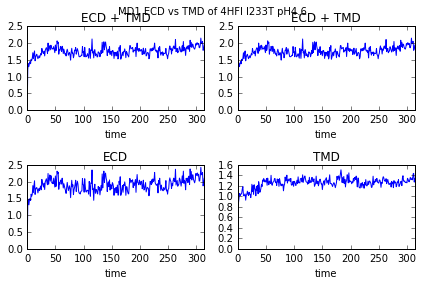

In [38]:
rmsd_ecd_4HFi_BA1_I233T = rmsd_ecd_dataframe("I233T","self")
rmsd_tmd_4HFi_BA1_I233T = rmsd_tmd_dataframe("I233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4HFi_I233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4HFi_I233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4HFi_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4HFi_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of 4HFI I233T pH4.6')
fig.tight_layout()

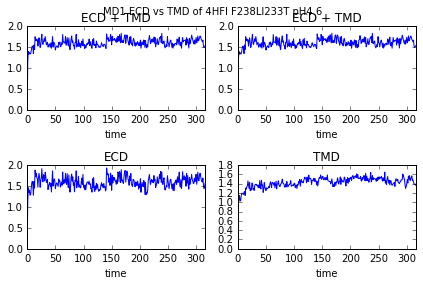

In [39]:
rmsd_ecd_4HFi_BA1_F238LI233T = rmsd_ecd_dataframe("F238LI233T","self")
rmsd_tmd_4HFi_BA1_F238LI233T = rmsd_tmd_dataframe("F238LI233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4HFi_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4HFi_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4HFi_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4HFi_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of 4HFI F238LI233T pH4.6')
fig.tight_layout()

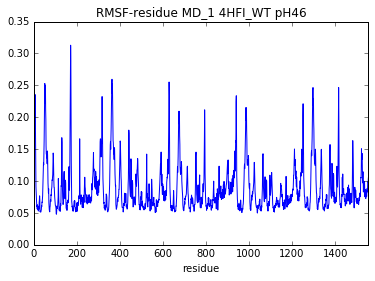

In [59]:
rmsf_resid_4HFI_WT = rmsf_resid_dataframe("WT")
rmsf_resid_4HFI_WT.plot(x='residue', y='RMSF',legend=False,title="RMSF-residue MD_1 4HFI_WT pH46")

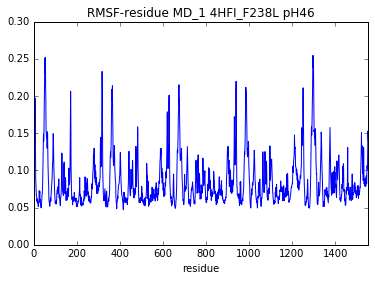

In [61]:
rmsf_resid_4HFI_F238L = rmsf_resid_dataframe("F238L")
rmsf_resid_4HFI_F238L.plot(x='residue', y='RMSF',legend=False,title="RMSF-residue MD_1 4HFI_F238L pH46")

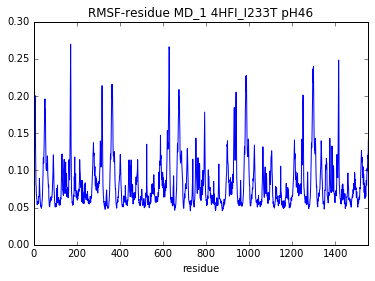

In [62]:
rmsf_resid_4HFI_I233T = rmsf_resid_dataframe("I233T")
rmsf_resid_4HFI_I233T.plot(x='residue', y='RMSF',legend=False,title="RMSF-residue MD_1 4HFI_I233T pH46")

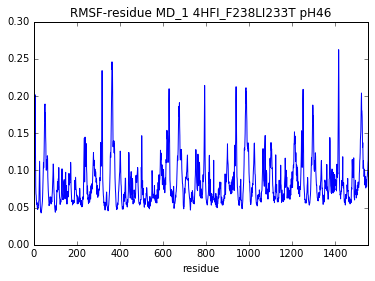

In [63]:
rmsf_resid_4HFI_F238LI233T = rmsf_resid_dataframe("F238LI233T")
rmsf_resid_4HFI_F238LI233T.plot(x='residue', y='RMSF',legend=False,title="RMSF-residue MD_1 4HFI_F238LI233T pH46")

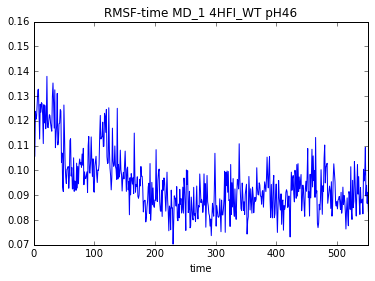

In [65]:
rmsf_time_4HFI_WT = rmsf_time_dataframe("WT")
rmsf_time_4HFI_WT.plot(x='time', y='RMSF',legend=False,title="RMSF-time MD_1 4HFI_WT pH46")

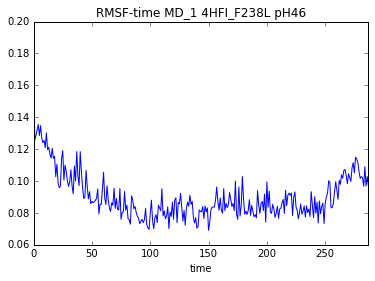

In [66]:
rmsf_time_4HFI_F238L = rmsf_time_dataframe("F238L")
rmsf_time_4HFI_F238L.plot(x='time', y='RMSF',legend=False,title="RMSF-time MD_1 4HFI_F238L pH46")

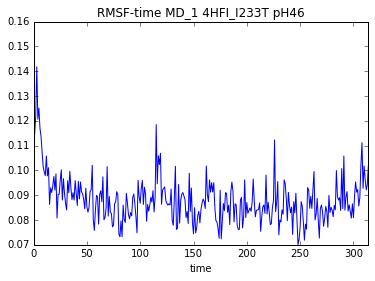

In [67]:
rmsf_time_4HFI_I233T = rmsf_time_dataframe("I233T")
rmsf_time_4HFI_I233T.plot(x='time', y='RMSF',legend=False,title="RMSF-time MD_1 4HFI_I233T pH46")

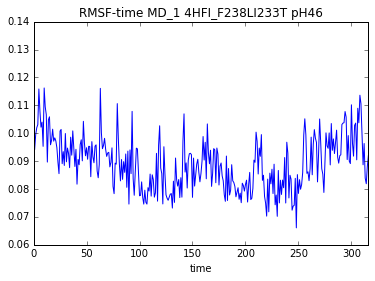

In [68]:
rmsf_time_4HFI_F238LI233T = rmsf_time_dataframe("F238LI233T")
rmsf_time_4HFI_F238LI233T.plot(x='time', y='RMSF',legend=False,title="RMSF-time MD_1 4HFI_F238LI233T pH46")

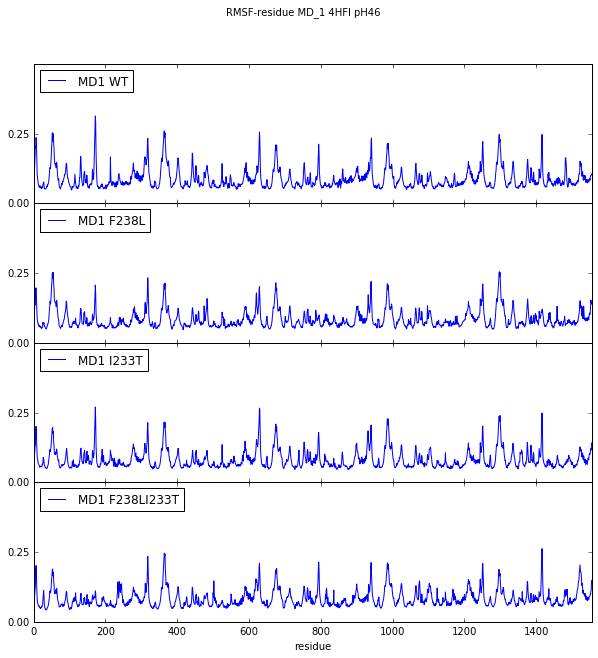

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=1,sharex=True,figsize=(10,10))
fig.subplots_adjust(hspace=0)
rmsf_resid_4HFI_WT.plot(x='residue', y='RMSF',ax=axes[0])
rmsf_resid_4HFI_F238L.plot(x='residue', y='RMSF',ax=axes[1])
rmsf_resid_4HFI_I233T.plot(x='residue', y='RMSF',ax=axes[2])
rmsf_resid_4HFI_F238LI233T.plot(x='residue', y='RMSF',ax=axes[3])

fig.suptitle("RMSF-residue MD_1 4HFI pH46")
axeslegend = ['MD1 WT',"MD1 F238L","MD1 I233T","MD1 F238LI233T"]
for i in range (0,4):
    axes[i].set_ylim(0,0.5)
    axes[i].set_yticks([0,0.25])
    axes[i].legend([axeslegend[i]],loc=2)